# <font color=blue>_Centre Calibration from Field Rastering at $\phi = 0^\circ$ and $\phi = 90^\circ$_</font>

In [118]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.xarray
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib notebook

### Rough Raster

In [119]:
x_start, x_end, x_step = 24, 29, 0.1
y_start, y_end, y_step = 18, 23, 0.1
x_pts = np.arange(x_start, x_end+x_step, x_step)
y_pts = np.arange(y_start, y_end+y_step, y_step)
x_zero = 0.0437063
y_zero = 0.0434812
z_zero = -0.0437816

In [120]:
phi0 = pd.read_csv('./2019-06-27/test_fieldRaster_2019-06-27_12.csv', comment='#')
phi90 = pd.read_csv('./2019-06-27/test_fieldRaster_2019-06-27_13.csv', comment='#')
phi45 = pd.read_csv('./2019-06-27/test_fieldRaster_2019-06-27_14.csv', comment='#')

<IPython.core.display.Javascript object>


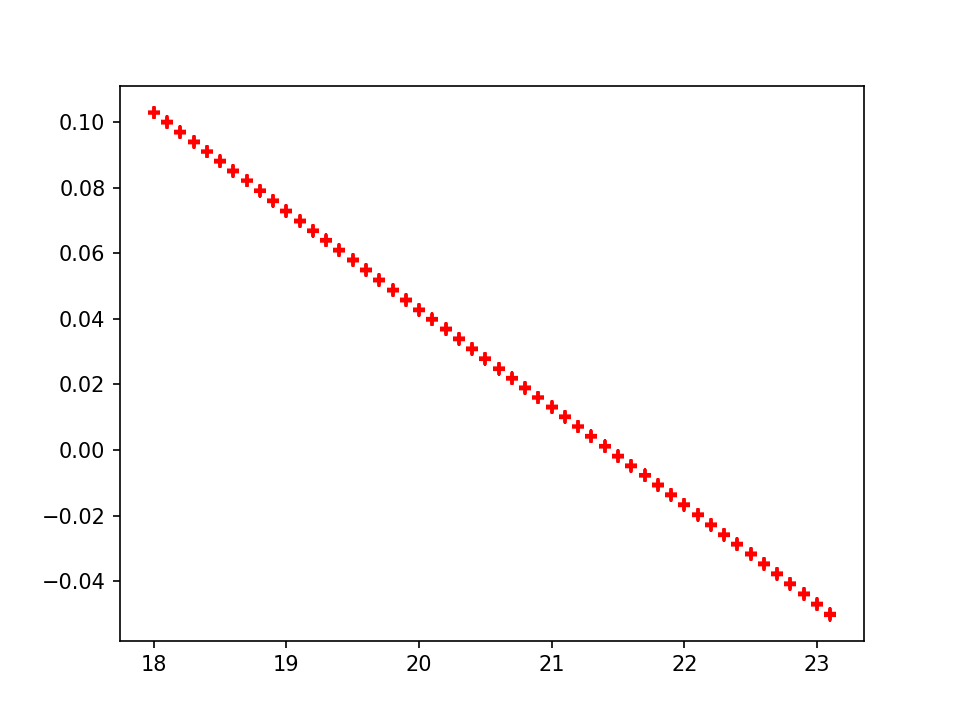

In [121]:
plt.plot(phi0['Y'].values, phi0['Zfield_avg'].values-z_zero, 'r+')

<IPython.core.display.Javascript object>


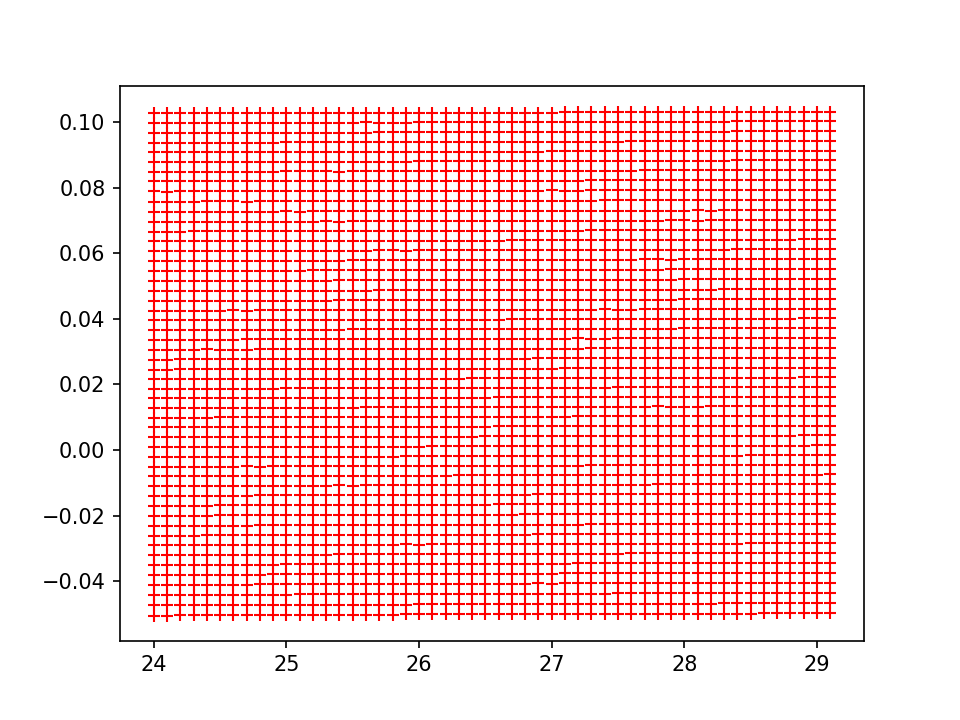

In [122]:
plt.plot(phi0['X'].values, (phi0['Zfield_avg'].values-z_zero), 'r+')

In [123]:
#Data variables dict
phi0_data_vars = {}
phi90_data_vars = {}

#Add (dims, data) tuple for each variable column to dict
for var in phi0.columns[:]:
    dims = ["Xpos", "Ypos"]
    data0 = phi0[var].values.reshape(y_pts.size, x_pts.size).transpose()
    phi0_data_vars[var] = (dims, data0)
    
for var in phi90.columns[:]:
    dims = ["Xpos", "Ypos"]
    data90 = phi90[var].values.reshape(y_pts.size, x_pts.size).transpose()
    phi90_data_vars[var] = (dims, data90)
    
coords = {"Xpos":('Xpos', x_pts), "Ypos":('Ypos', y_pts)}
phi0_ds = xr.Dataset(phi0_data_vars, coords)
phi90_ds = xr.Dataset(phi90_data_vars, coords)

In [124]:
phi0_ds.Zfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [125]:
phi90_ds.Zfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [126]:
combined_Yfield_zero = (phi0_ds.Yfield_avg - y_zero)**2 + (phi90_ds.Yfield_avg - y_zero)**2
combined_Yfield_zero.hvplot()

:Image   [Ypos,Xpos]   (Yfield_avg)

In [127]:
combined_Yfield_zero.where(combined_Yfield_zero == combined_Yfield_zero.max(), drop=True)

<xarray.DataArray 'Yfield_avg' (Xpos: 1, Ypos: 1)>
array([[0.049396]])
Coordinates:
  * Xpos     (Xpos) float64 26.1
  * Ypos     (Ypos) float64 21.4

In [128]:
combined_Zfield_zero = (phi0_ds.Zfield_avg - z_zero)**2 + (phi90_ds.Zfield_avg - z_zero)**2
combined_Zfield_zero.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [129]:
combined_Zfield_zero.where(combined_Zfield_zero == combined_Zfield_zero.min(), drop=True)

<xarray.DataArray 'Zfield_avg' (Xpos: 1, Ypos: 1)>
array([[2.863152e-06]])
Coordinates:
  * Xpos     (Xpos) float64 26.5
  * Ypos     (Ypos) float64 21.4

Plot Quivers

In [72]:
x = phi0['X']
y = phi0['Y']
z = [0]

x_field = phi0['Xfield_avg'] - x_zero
#x_field = phi0['Xfield_avg']
y_field = phi0['Yfield_avg'] - y_zero
z_field = phi0['Zfield_avg'] - z_zero
plt.figure(2)
plt.quiver(x, y, x_field, y_field, pivot='middle', scale = 10)
plt.title('phi0 xy plane field')
#fig = plt.figure()
#ax = fig.add_subplot(111, projection ='3d')
#ax.quiver(x_pts, y_pts, z_pts, x_field, y_field, z_field, length = 0.9)

Text(0.5, 1.0, 'phi0 xy plane field')

In [34]:
x = phi90['X']
y = phi90['Y']
z = [0]

plt.figure(2)
x_field = phi90['Xfield_avg'] - x_zero
y_field = phi90['Yfield_avg'] - y_zero
z_field = phi90['Zfield_avg'] - z_zero
plt.title('phi90 xy plane field')
plt.quiver(x, y, x_field, y_field, pivot='middle', scale = 10)

### Rough: z field (26.1, 21.4), y field (26.5, 21.4) avg (26.3, 21.4)

In [130]:
zfield_x, zfield_y = 26.5, 21.4
yfield_x, yfield_y = 26.1, 21.4

In [131]:
phi0_phi = np.arctan2(phi0_ds.Xfield_avg-x_zero, phi0_ds.Yfield_avg-y_zero)
phi90_phi = np.arctan2(phi90_ds.Yfield_avg-y_zero, phi90_ds.Xfield_avg-x_zero)
theta0_phi = np.arctan2(np.sqrt((phi0_ds.Xfield_avg-x_zero)**2 + (phi0_ds.Yfield_avg-y_zero)**2), (phi0_ds.Zfield_avg-z_zero))
theta90_phi = np.arctan2(np.sqrt((phi90_ds.Xfield_avg-x_zero)**2 + (phi90_ds.Yfield_avg-y_zero)**2), (phi90_ds.Zfield_avg-z_zero))

### Z field min

In [132]:
print('phi0 : phi = %1.2f' % (phi0_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))
print('phi90 : phi = %1.2f' % (phi90_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))
print('phi0 : theta = %1.2f' % (theta0_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))
print('phi90 : theta = %1.2f' % (theta90_phi.sel(Xpos=zfield_x, Ypos=zfield_y, method='backfill').values*180/np.pi))

phi0 : phi = 179.92
phi90 : phi = -179.79
phi0 : theta = 89.72
phi90 : theta = 90.33


### Y field max

In [133]:
print('phi0 : phi = %1.2f' % (phi0_phi.sel(Xpos=yfield_x, Ypos=yfield_y, method='backfill').values*180/np.pi))
print('phi90 : phi = %1.2f' % (phi90_phi.sel(Xpos=yfield_x, Ypos=yfield_y, method='backfill').values*180/np.pi))
print('phi0 : theta = %1.2f' % (theta0_phi.sel(Xpos=yfield_x, Ypos=yfield_y, method='backfill').values*180/np.pi))
print('phi90 : theta = %1.2f' % (theta90_phi.sel(Xpos=yfield_x, Ypos=yfield_y, method='backfill').values*180/np.pi))

phi0 : phi = 179.91
phi90 : phi = -179.76
phi0 : theta = 89.73
phi90 : theta = 93.42


### Off by about 1$^\circ$ in both directions except for Y field maxima theta, we use Z field min
Try again with smaller steps

### Finest Raster step = 0.01mm

In [134]:
x_start, x_end, x_step = 26.2, 26.7, 0.01
y_start, y_end, y_step = 21.2, 21.6, 0.01
x_pts = np.arange(x_start, x_end+x_step, x_step)
y_pts = np.arange(y_start, y_end+y_step, y_step)
phi0 = pd.read_csv('./2019-06-28/fine0_fieldRaster_2019-06-28_4.csv', comment='#')
phi90 = pd.read_csv('./2019-06-28/fine90_fieldRaster_2019-06-28_3.csv', comment='#')
x_zero = 0.0437063
y_zero = 0.0434812
z_zero = -0.0437816

<IPython.core.display.Javascript object>


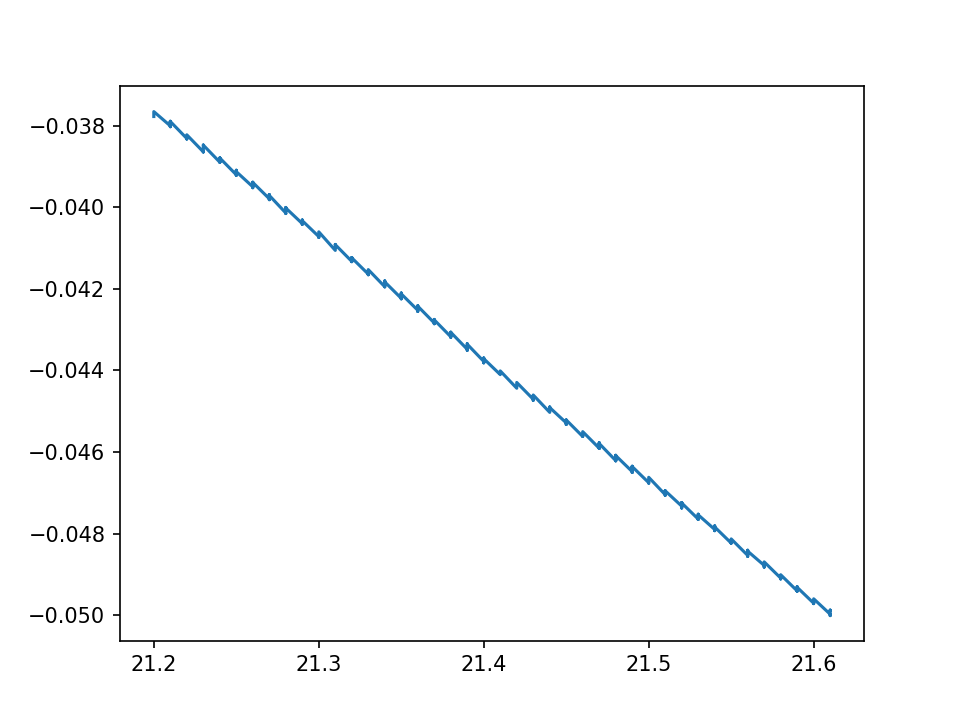

In [135]:
plt.plot(phi0['Y'].values, phi0['Zfield_avg'].values)

<IPython.core.display.Javascript object>


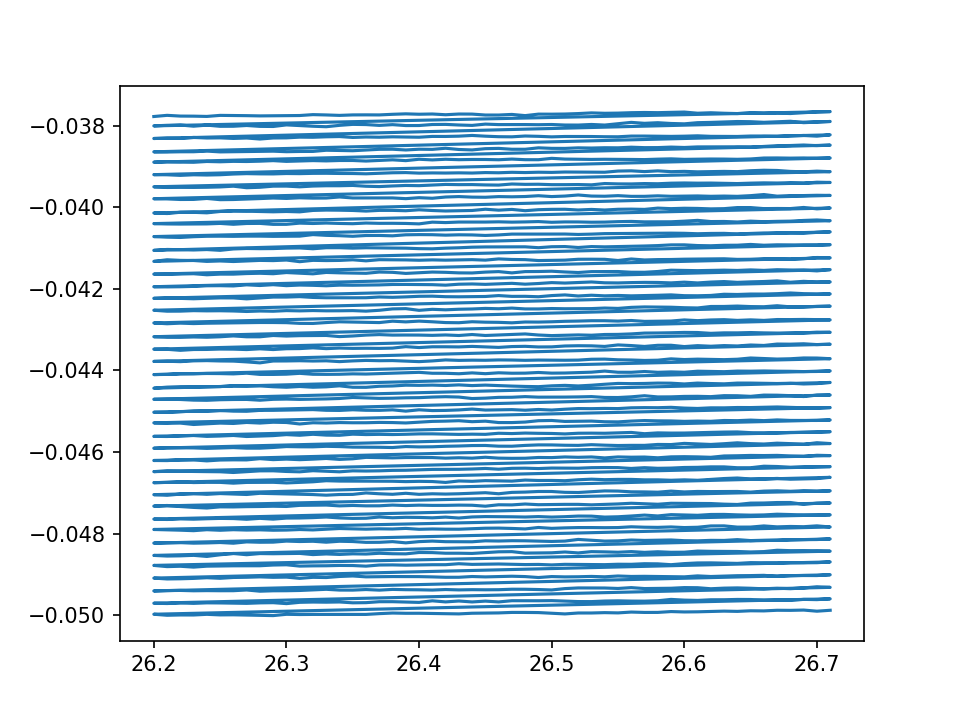

In [136]:
plt.plot(phi0['X'].values, phi0['Zfield_avg'].values)

In [137]:
#Data variables dict
phi0_data_vars = {}
phi90_data_vars = {}

#Add (dims, data) tuple for each variable column to dict
for var in phi0.columns[:]:
    dims = ["Xpos", "Ypos"]
    data0 = phi0[var].values.reshape(y_pts.size, x_pts.size).transpose()
    phi0_data_vars[var] = (dims, data0)
    
for var in phi90.columns[:]:
    dims = ["Xpos", "Ypos"]
    data90 = phi90[var].values.reshape(y_pts.size, x_pts.size).transpose()
    phi90_data_vars[var] = (dims, data90)
    
coords = {"Xpos":('Xpos', x_pts), "Ypos":('Ypos', y_pts)}
phi0_ds = xr.Dataset(phi0_data_vars, coords)
phi90_ds = xr.Dataset(phi90_data_vars, coords)

In [138]:
zfieldzeroed = np.sqrt((phi0_ds.Zfield_avg-z_zero)**2 + (phi90_ds.Zfield_avg-z_zero)**2)
zfieldzeroed.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [139]:
zfieldmin = zfieldzeroed.where(zfieldzeroed == zfieldzeroed.min(), drop=True)
zcen_x = zfieldmin.Xpos.values[0]
zcen_y = zfieldmin.Ypos.values[0]
print(zcen_x, zcen_y)          

26.320000000000018 21.40000000000003


In [140]:
yfieldzeroed = np.sqrt((phi0_ds.Yfield_avg-y_zero)**2 + (phi90_ds.Yfield_avg-y_zero)**2)
yfieldzeroed.hvplot()

:Image   [Ypos,Xpos]   (Yfield_avg)

In [141]:
yfieldmax = yfieldzeroed.where(yfieldzeroed == yfieldzeroed.max(), drop=True)
ycen_x = yfieldmax.Xpos.values[0]
ycen_y = yfieldmax.Ypos.values[0]
print(ycen_x, ycen_y)

26.52000000000005 21.360000000000024


### Angles

In [142]:
phi0_phi = np.arctan2(phi0_ds.Xfield_avg-x_zero, phi0_ds.Yfield_avg-y_zero)
phi90_phi = np.arctan2(phi90_ds.Yfield_avg-y_zero, phi90_ds.Xfield_avg-x_zero)
theta0_phi = np.arctan2(np.sqrt((phi0_ds.Xfield_avg-x_zero)**2 + (phi0_ds.Yfield_avg-y_zero)**2), (phi0_ds.Zfield_avg-z_zero))
theta90_phi = np.arctan2(np.sqrt((phi90_ds.Xfield_avg-x_zero)**2 + (phi90_ds.Yfield_avg-y_zero)**2), (phi90_ds.Zfield_avg-z_zero))

In [143]:
print('phi0 : phi = %1.2f' % (phi0_phi.sel(Xpos=zcen_x, Ypos=zcen_y, method='backfill').values*180/np.pi))
print('phi90 : phi = %1.2f' % (phi90_phi.sel(Xpos=zcen_x, Ypos=zcen_y, method='backfill').values*180/np.pi))
print('phi0 : theta = %1.2f' % (theta0_phi.sel(Xpos=zcen_x, Ypos=zcen_y, method='backfill').values*180/np.pi))
print('phi90 : theta = %1.2f' % (theta90_phi.sel(Xpos=zcen_x, Ypos=zcen_y, method='backfill').values*180/np.pi))

phi0 : phi = -179.95
phi90 : phi = -179.97
phi0 : theta = 90.00
phi90 : theta = 90.04


In [144]:
print('phi0 : phi = %1.2f' % (phi0_phi.sel(Xpos=ycen_x, Ypos=ycen_y, method='backfill').values*180/np.pi))
print('phi90 : phi = %1.2f' % (phi90_phi.sel(Xpos=ycen_x, Ypos=ycen_y, method='backfill').values*180/np.pi))
print('phi0 : theta = %1.2f' % (theta0_phi.sel(Xpos=ycen_x, Ypos=ycen_y, method='backfill').values*180/np.pi))
print('phi90 : theta = %1.2f' % (theta90_phi.sel(Xpos=ycen_x, Ypos=ycen_y, method='backfill').values*180/np.pi))

phi0 : phi = -179.95
phi90 : phi = -179.98
phi0 : theta = 89.67
phi90 : theta = 88.51


### Seems like Z center is more accurate, use (26.32, 21.40)

In [146]:
inplane = (phi0_ds.Yfield_avg-y_zero)**2 + (phi90_ds.Xfield_avg-x_zero)**2
inplane.hvplot()

:Image   [Ypos,Xpos]   (value)

In [147]:
inplanemax = inplane.where(inplane==inplane.max(), drop=True)
inplanecen_x, inplanecen_y = inplanemax.Xpos.values[0], inplanemax.Ypos.values[0]
print(inplanecen_x, inplanecen_y)

26.220000000000002 21.290000000000013


In [148]:
import scipy.signal as sig
convolved = sig.convolve2d(zfieldzeroed.values, inplane.values, mode='same')
convolved_da = xr.DataArray(convolved, coords=[x_pts,y_pts], dims = ['Xpos', 'Ypos'])
convmax = convolved_da.where(convolved_da == convolved_da.max(), drop=True)
conv_cen_x, conv_cen_y = convmax.Xpos.values[0], convmax.Ypos.values[0]
print(conv_cen_x, conv_cen_y)

26.46000000000004 21.410000000000032


In [149]:
convolved_da.hvplot()

:Image   [Ypos,Xpos]   (value)

In [151]:
import scipy.optimize as optimize
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p, success

# Analyse in plane field data

[1.01302711e-01 4.11556500e+00 1.55075992e+01 8.23464126e+02
 7.30234532e+02]
52 42 52


<IPython.core.display.Javascript object>


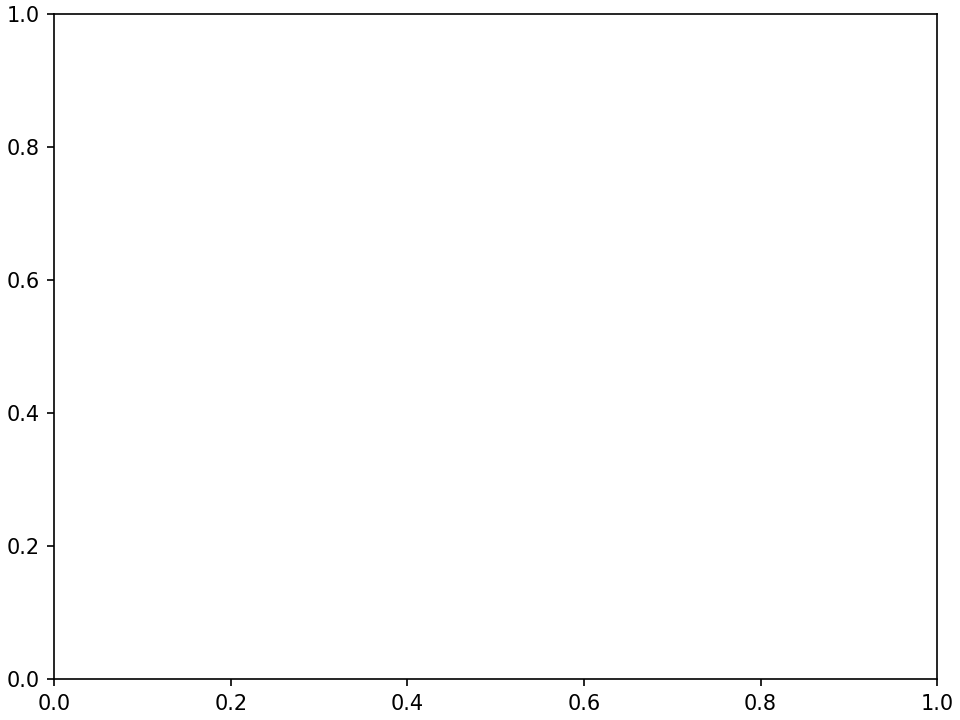

TypeError: Length of x must be number of columns in z.

In [153]:
import scipy.signal as sig

# Inplane field data
x, y, field = inplane.Xpos.values, inplane.Ypos.values, inplane.values
xy = np.meshgrid(x,y)
x_guess, y_guess = 26.4, 21.7
gauss = gaussian(1, x_guess, y_guess, 10, 10)(xy[0], xy[1])

# Fit to Gaussian
params, success = fitgaussian(data)
fitteddata = gaussian(*params)(xy[0], xy[1])
print(params)

# Convolve
convolved = sig.convolve2d(field, gauss, mode='same')
print(len(convolved), len(gauss), len(field))

# Plot data
fig1, ax1 = plt.subplots(constrained_layout=True)
CS = ax1.contourf(x,y,field, 10, cmap=plt.cm.bone)
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Inplane field')

# Plot gaussian
fig2, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(x,y,gauss, 10, cmap=plt.cm.bone)
cbar = fig2.colorbar(CS)
cbar.ax.set_ylabel('Inplane field')

# Plot convolved
fig3, ax3 = plt.subplots(constrained_layout=True)
CS = ax3.contourf(x,y,convolved, 10, cmap=plt.cm.bone)
cbar = fig3.colorbar(CS)
cbar.ax.set_ylabel('Inplane field')

In [66]:
inplane.where(inplane==inplane.max(), drop=True)

<xarray.DataArray (Xpos: 1, Ypos: 1)>
array([[0.024978]])
Coordinates:
  * Xpos     (Xpos) float64 26.44
  * Ypos     (Ypos) float64 21.62

#### Phi/Theta at Z field minima

In [122]:
phi0_phi = np.arctan2(phi0_ds.Xfield_avg, phi0_ds.Yfield_avg)
phi90_phi = np.arctan2(phi90_ds.Yfield_avg, phi90_ds.Xfield_avg)
theta0_phi = np.arctan2(np.sqrt(phi0_ds.Xfield_avg**2 + phi0_ds.Yfield_avg**2), phi0_ds.Zfield_avg)
theta90_phi = np.arctan2(np.sqrt(phi90_ds.Xfield_avg**2 + phi90_ds.Yfield_avg**2), phi90_ds.Zfield_avg)
print('phi0 : phi = %1.2f' % (phi0_phi.sel(Xpos=zcen_x, Ypos=zcen_y, method='backfill').values*180/np.pi))
print('phi90 : phi = %1.2f' % (phi90_phi.sel(Xpos=zcen_x, Ypos=zcen_y, method='backfill').values*180/np.pi))
print('phi0 : theta = %1.2f' % (theta0_phi.sel(Xpos=zcen_x, Ypos=zcen_y, method='backfill').values*180/np.pi))
print('phi90 : theta = %1.2f' % (theta90_phi.sel(Xpos=zcen_x, Ypos=zcen_y, method='backfill').values*180/np.pi))

phi0 : phi = -0.96
phi90 : phi = 0.98
phi0 : theta = 90.04
phi90 : theta = 90.07


#### Phi/Theta at Y field maxima

In [132]:
phi0_phi = np.arctan2(phi0_ds.Xfield_avg, phi0_ds.Yfield_avg)
phi90_phi = np.arctan2(phi90_ds.Yfield_avg, phi90_ds.Xfield_avg)
theta0_phi = np.arctan2(np.sqrt(phi0_ds.Xfield_avg**2 + phi0_ds.Yfield_avg**2), phi0_ds.Zfield_avg)
theta90_phi = np.arctan2(np.sqrt(phi90_ds.Xfield_avg**2 + phi90_ds.Yfield_avg**2), phi90_ds.Zfield_avg)
print('phi0 : phi = %1.2f' % (phi0_phi.sel(Xpos=ycen_x, Ypos=ycen_y, method='backfill').values*180/np.pi))
print('phi90 : phi = %1.2f' % (phi90_phi.sel(Xpos=ycen_x, Ypos=ycen_y, method='backfill').values*180/np.pi))
print('phi0 : theta = %1.2f' % (theta0_phi.sel(Xpos=ycen_x, Ypos=ycen_y, method='backfill').values*180/np.pi))
print('phi90 : theta = %1.2f' % (theta90_phi.sel(Xpos=ycen_x, Ypos=ycen_y, method='backfill').values*180/np.pi))

phi0 : phi = -0.96
phi90 : phi = 0.97
phi0 : theta = 89.91
phi90 : theta = 88.98


#### Phi/Theta at convolved maxima

In [127]:
phi0_phi = np.arctan2(phi0_ds.Xfield_avg, phi0_ds.Yfield_avg)
phi90_phi = np.arctan2(phi90_ds.Yfield_avg, phi90_ds.Xfield_avg)
theta0_phi = np.arctan2(np.sqrt(phi0_ds.Xfield_avg**2 + phi0_ds.Yfield_avg**2), phi0_ds.Zfield_avg)
theta90_phi = np.arctan2(np.sqrt(phi90_ds.Xfield_avg**2 + phi90_ds.Yfield_avg**2), phi90_ds.Zfield_avg)
print('phi0 : phi = %1.2f' % (phi0_phi.sel(Xpos=conv_cen_x, Ypos=conv_cen_y, method='backfill').values*180/np.pi))
print('phi90 : phi = %1.2f' % (phi90_phi.sel(Xpos=conv_cen_x, Ypos=conv_cen_y, method='backfill').values*180/np.pi))
print('phi0 : theta = %1.2f' % (theta0_phi.sel(Xpos=conv_cen_x, Ypos=conv_cen_y, method='backfill').values*180/np.pi))
print('phi90 : theta = %1.2f' % (theta90_phi.sel(Xpos=conv_cen_x, Ypos=conv_cen_y, method='backfill').values*180/np.pi))

phi0 : phi = -0.95
phi90 : phi = 0.96
phi0 : theta = 90.03
phi90 : theta = 89.75


### Summary

In [136]:
print('z field minima: (%1.5f, %1.5f)' % (zcen_x, zcen_y))
print('y field maxima: (%1.5f, %1.5f)' % (ycen_x, ycen_y))
print('convolved: (%1.5f, %1.5f)' % (conv_cen_x, conv_cen_y))

z field minima: (26.41900, 21.76000)
y field maxima: (26.43900, 21.62000)
convolved: (26.41900, 21.72000)


### Best values obtained at z field minima 

In [137]:
import numpy as np
f_cen = [[zcen_x, zcen_y]]
print(f_cen)
np.savetxt("proj_field_center_calib_icarus.csv", f_cen, delimiter=",")

[[26.418999999999993, 21.75999999999999]]
